# **Coursework: Programming for Data Science (20COP504)**

## **Coursework 2 (60%)**

In this coursework, you will analyse a publicly available dataset named IMDB-Movie-Data. This is a
data set of 1,000 most popular movies on IMDB in the last 10 years. The data points included are Title,
Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascore.

Go to https://www.kaggle.com/PromptCloudHQ/imdb-data and download the IMDB-MovieData.csv.

**1.1**

(1) Read the data into a DataFrame called movies and get the number of columns and rows. 

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data into dataframe
movies = pd.read_csv('IMDB-Movie-Data.csv')

# get number of columns and rows
print("columns:", movies.shape[1])
print("rows:", movies.shape[0])

columns: 12
rows: 1000


(2) Get the minimum, maximum, and mean value of each numerical column. 

In [2]:
# function to check if element in array is numeric, from 
# https://stackoverflow.com/questions/37996471/element-wise-test-of-numpy-array-is-numeric
def isnumeric(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# make list to get column names
cols = []
for col in movies:
  cols.append(col)

# get names of numerical columns
numerical_cols = []  
for col in cols:
  if isnumeric(movies[col][0]) == True:
    numerical_cols.append(col)

# get min, max, and mean values for numerical cols
min_values = movies[numerical_cols].min()
max_values = movies[numerical_cols].max()
mean_values = movies[numerical_cols].mean()

# print min, max, and mean values for numerical cols
print('MINIMUM VALUES:')
print(min_values)
print("\n")
print('MAXIMUM VALUES:')
print(max_values)
print("\n")
print('MEAN VALUES:')
print(mean_values)

MINIMUM VALUES:
Rank                     1.0
Year                  2006.0
Runtime (Minutes)       66.0
Rating                   1.9
Votes                   61.0
Revenue (Millions)       0.0
Metascore               11.0
dtype: float64


MAXIMUM VALUES:
Rank                     1000.00
Year                     2016.00
Runtime (Minutes)         191.00
Rating                      9.00
Votes                 1791916.00
Revenue (Millions)        936.63
Metascore                 100.00
dtype: float64


MEAN VALUES:
Rank                     500.500000
Year                    2012.783000
Runtime (Minutes)        113.172000
Rating                     6.723200
Votes                 169808.255000
Revenue (Millions)        82.956376
Metascore                 58.985043
dtype: float64


(3) Rename Runtime (Minutes) to Runtime_Minutes and revenue (Millions) to Revenue_Millions, respectively

In [3]:
# rename columns
movies.rename(columns={'Runtime (Minutes)': 'Runtime_Minutes'}, inplace=True)
movies.rename(columns={'Revenue (Millions)': 'Revenue_Millions'}, inplace=True)

# check to see if cols renamed
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


**1.2**

Find all null values in the DataFrame movies. Fill the null values with the mean value of the
corresponding column and produce a cleaned DataFrame called clean_movies. Please note that all
the following tasks will be using clean_movies. 

In [4]:
# declare new dataframe to be used
clean_movies = movies

# count number of NA values in each column
print(movies.isnull().sum())

# loop through dataframe, changing NA values to mean
for col in clean_movies:
  # check if column is numeric
  if isnumeric(clean_movies[col][0]) == True:
    # col names have changed since means were calculated, so need to write 
    # exception for theses cases
    if col == 'Runtime_Minutes':
      clean_movies[col].fillna(mean_values['Runtime (Minutes)'], inplace = True)
    # if col names are same as before, change NA values
    elif col == 'Revenue_Millions':
      clean_movies[col].fillna(mean_values['Revenue (Millions)'], inplace = True)
    else:
      clean_movies[col].fillna(mean_values[col], inplace = True)

# count number of NA values in each column of new dataframe
print("\n")
print(clean_movies.isnull().sum())

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime_Minutes       0
Rating                0
Votes                 0
Revenue_Millions    128
Metascore            64
dtype: int64


Rank                0
Title               0
Genre               0
Description         0
Director            0
Actors              0
Year                0
Runtime_Minutes     0
Rating              0
Votes               0
Revenue_Millions    0
Metascore           0
dtype: int64


**1.3**


Create a histogram to illustrate the distribution of the Runtime. Please set the bin size to 10. 

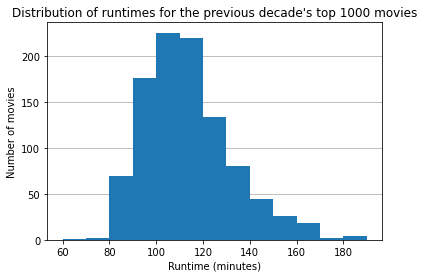

In [5]:
# create histogram, with bins of size 10
plt.hist(x=clean_movies.Runtime_Minutes, bins=range(60, 200, 10), zorder=4)

# add labels and title
plt.title("Distribution of runtimes for the previous decade's top 1000 movies")
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of movies')
plt.grid(axis='y', zorder=0)

**1.4**

Rank the Directors according to their average Rating. Select the top ten Directors and draw a proper
chart to compare their average Rating. 

Director
Nitesh Tiwari                       8.80
Christopher Nolan                   8.68
Makoto Shinkai                      8.60
Olivier Nakache                     8.60
Aamir Khan                          8.50
Florian Henckel von Donnersmarck    8.50
Naoko Yamada                        8.40
Damien Chazelle                     8.40
Lee Unkrich                         8.30
S.S. Rajamouli                      8.30
Name: Rating, dtype: float64


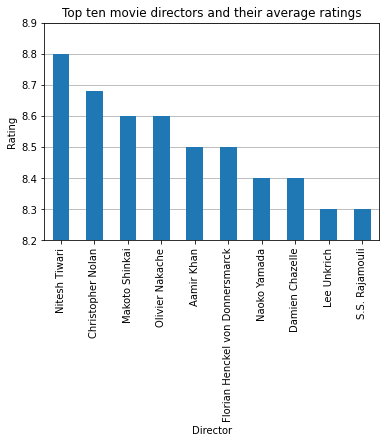

In [6]:
# make dataframe containing average rating for directors
clean_movie_directors = clean_movies.groupby('Director')['Rating'].mean()
# sort by director average rating
clean_movie_directors = clean_movie_directors.sort_values(ascending = False)

# select top 10 directors
top_directors = clean_movie_directors.head(10)

# print top ten directors
print(top_directors)

# create plot
top_directors.plot(kind='bar', zorder=3)

# add titles and labels
plt.title("Top ten movie directors and their average ratings")
plt.xlabel('Director')
plt.ylabel('Rating')

# improve aesthetics
plt.ylim(8.2, 8.9)
plt.grid(axis='y', zorder=0)

# show plot
plt.show()

**1.5**

(1) Use NumPy to generate three random integers as indices. 

In [7]:
# create empty list to store indeces
indeces = []
# loop through 3 times to get 3 indeces
for i in range(3):
  indeces.append(np.random.randint(0, 1000))

#print indeces
print(indeces)

[564, 502, 215]


(2) Use the generated three indices to select the corresponding three Directors. 

In [8]:
# select director of movies corresponding to the indeces
random_directors = clean_movies.iloc[indeces][['Director']]

# turn directors into list for easier analysis
# declare empty list
directors_list = []

# loop through random_directors dataframe, assigning each director to list
for i in range(len(random_directors)):
  directors_list.append(random_directors.iloc[i,0])

# show the 3 directors
print(directors_list)

['Rupert Sanders', 'Daniel Ragussis', 'Alex Proyas']


(3) Calculate the annual Metascore of the selected three Directors. 

In [9]:
# create dataframe for each direcor in driectors_list
director0 = clean_movies[clean_movies['Director'] == directors_list[0]]
director1 = clean_movies[clean_movies['Director'] == directors_list[1]]
director2 = clean_movies[clean_movies['Director'] == directors_list[2]]

# get metascore for each year for each director
annual_meta0 = director0.groupby(['Year', 'Director'])[['Metascore']].mean()
annual_meta1 = director1.groupby(['Year', 'Director'])[['Metascore']].mean()
annual_meta2 = director2.groupby(['Year', 'Director'])[['Metascore']].mean()

# show annual metascore for the 3 directors
print(annual_meta0)
print("\n")
print(annual_meta1)
print("\n")
print(annual_meta2)

                     Metascore
Year Director                 
2012 Rupert Sanders       57.0


                      Metascore
Year Director                  
2016 Daniel Ragussis       68.0


                  Metascore
Year Director              
2016 Alex Proyas       25.0


(4) Use three subplots to illustrate their Metascore by year. The range of the x-axis should be from
2006 to 2016. 

(2005.0, 2017.0)

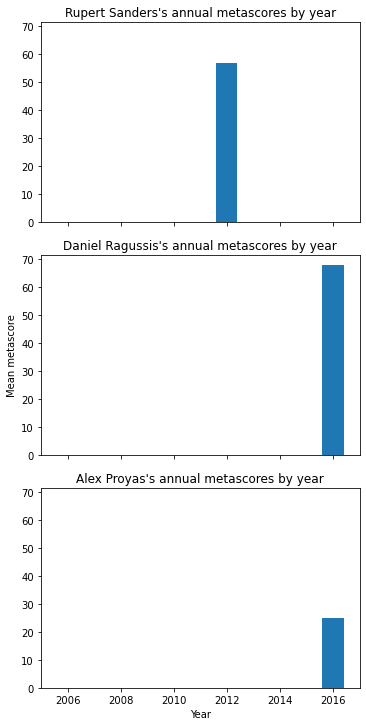

In [10]:
# set up subplot grid
fig, (ax0, ax1, ax2) = plt.subplots(3,1, sharex=True, sharey=True, figsize=(5,10))

# plot director 0
ax0.bar(list(director0['Year']), list(annual_meta0['Metascore']))
# add title
ax0.set_title(directors_list[0] + "'s annual metascores by year")

# plot director 1
ax1.bar(list(director1['Year']), list(annual_meta1['Metascore']))
# add title
ax1.set_title(directors_list[1] + "'s annual metascores by year")

# plot director 2
ax2.bar(list(director2['Year']), list(annual_meta2['Metascore']))
# add title
ax2.set_title(directors_list[2] + "'s annual metascores by year")

# improve aesthetics
plt.tight_layout()
ax2.set_xlabel('Year')
ax1.set_ylabel('Mean metascore')
# I limited axis to 2005-2017 to see bars more clearly
ax2.set_xlim(2005, 2017)

**1.6**

Use Revenue and Metascore to select samples that satisfy some conditions (the selection should
include three conditional operators and two logical operators). Based on the selected samples, draw
a scatter chart to show the relationship between Revenue and Metascore. 

Text(0.5, 0, 'Metascore')

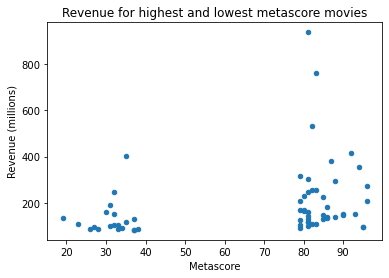

In [11]:
# Get mean values for metascore and revenue
mean_revenue = float(mean_values['Revenue (Millions)'])
mean_metascore = float(mean_values.Metascore)

# Get high revenue movies at either end of metascore spectrum
money_makers = clean_movies[(clean_movies['Revenue_Millions'] > mean_revenue) & 
             ((clean_movies['Metascore'] < mean_metascore - 20) | 
             (clean_movies['Metascore'] > mean_metascore + 20))]

# scatter plot data
ax = money_makers.plot(x='Metascore', y='Revenue_Millions', kind='scatter')

# add title, labels
ax.set_title('Revenue for highest and lowest metascore movies')
ax.set_ylabel("Revenue (millions)")
ax.set_xlabel("Metascore")

**1.7**

Use NumPy to generate 30 random integers from 0 to 1000. Use the generated 30 integers as indices
and extract relative rows from the DataFrame clean_movies.

Draw a chart to present the relationship between Year and Votes. Please use Year as the x-axis and
Votes as the y-axis. The range of the x-axis should be from 2006 to 2016. 


[77, 256, 240, 341, 898, 755, 463, 133, 919, 408, 5, 363, 829, 36, 617, 525, 20, 187, 733, 168, 568, 305, 836, 602, 330, 537, 858, 198, 82, 607]


(2005.9, 2016.1)

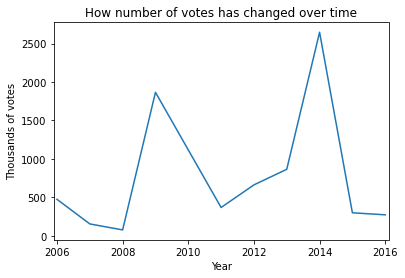

In [12]:
# create empty list to store indeces
indeces2 = []
# loop through 30 times to get 30 indeces
for i in range(30):
  indeces2.append(np.random.randint(0, 1000))

#print indeces
print(indeces2)

# select rows in clean_movies corresponding to the indeces
rows = clean_movies.iloc[indeces2]
rows = rows.groupby('Year').sum()

# convert votes to thousands of votes
rows['thousands_votes'] = rows['Votes'] / 1000

# plot votes against year
ax = rows['thousands_votes'].plot()

# add labels
ax.set_title('How number of votes has changed over time')
ax.set_ylabel("Thousands of votes")
ax.set_xlabel("Year")

# limit axes
ax.set_xlim(2005.9, 2016.1)